In [60]:
import numpy as np
from utils import momento

In [61]:
import os
import pandas as pd 

data_path = os.path.join('.','datos','datosmasas.csv')

dt = pd.read_csv(data_path, index_col=0)
dt.head()

,masas,x,y,z
particula,,,,
1,2.0,-53.0,79.0,-91.0
2,2.0,13.0,-142.0,-177.0
3,2.0,-109.0,-103.0,-120.0
4,2.0,4.0,-96.0,110.0
5,4.0,222.0,-22.0,-236.0


In [62]:
import matplotlib.pyplot as plt 

masas = np.array(dt['masas'])
masas = masas[:, None]

x = np.array(dt['x'])
y = np.array(dt['y'])

print(x.shape)


(1533,)


In [63]:
_input = np.stack([x,y], 1)

momento0 = momento( masas, _input, n=0)
momento1 = momento( masas, _input, n=1)
momento2 = momento( masas, _input, n=2)

In [64]:
print("Momento 0  - Masa total del sistema")
print(momento0)

Momento 0  - Masa total del sistema
[[4627.]]


In [65]:
momento1[1]

array([4850.6347032])

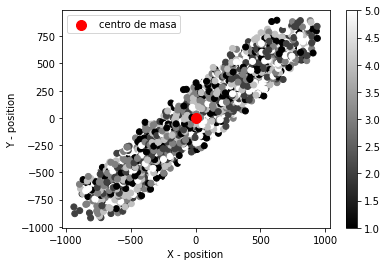

In [66]:


x_center = x - np.mean(x)
y_center = y - np.mean(y)


normalize_center = momento1/momento0
cmasa_x , cmasa_y = normalize_center[0] , normalize_center[1]


sc = plt.scatter(x_center, y_center, c=masas, cmap='gray')
plt.xlabel("X - position")
plt.ylabel("Y - position")
plt.scatter(cmasa_x, cmasa_y, s=100, c='red', label='centro de masa')
plt.legend()
plt.colorbar(sc)




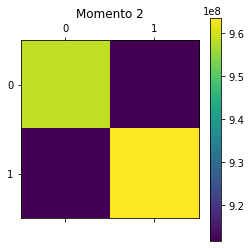

In [67]:
plt.matshow(momento2 )
plt.title("Momento 2")
plt.colorbar()
plt.show()

In [68]:
vectori = np.array([1, 0])[:, None]
vectorj = np.array([0, 1])[:, None]

base = [vectori, vectorj]



* ¿Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa? Esto es: ¿Los vectores cartesianos son autovectores del tensor momento de inercia?

Dada la definición formal: Sea $A : V \rightarrow V$ un operador lineal de cierto $\mathbb{K}$-espacio vectorial $V$ y un vector $\textbf{v}$ no nulo en $V$. Si existe un escalar $c$ tal que:

$$ A\textbf{v} = c\textbf{v}, \quad \textbf{v} \neq 0, \quad c \in \mathbb{K}, $$

entonces decirmos que $\textbf{v}$ es un vector propio del operador $A$. 

Dicho esto, una forma de verificar que los vector base del sistema cartesiano $|e_i\rangle$ sean autovectores del tensor momento de inceria $M_2$ consiste en realizar la transformación $M_2|e_i\rangle$ y verificar si esta transformación se pude espresar como $c|e_i\rangle$ dada la definición del vector propio.


In [69]:

for vi in base:
    _lambda  = ( momento2 @ vi )
    print("ei: ", vi.flatten())
    print("M|ei>: ",_lambda.flatten())


ei:  [1 0]
M|ei>:  [9.58603863e+08 9.11766544e+08]
ei:  [0 1]
M|ei>:  [9.11766544e+08 9.63665233e+08]


* Encuentre los ejes principales de inercia para esta distribución de masas. Esto es aquellos vectores propios del tensor de inercia, que forma una base ortogonal respecto a la cual la distribución de las masas se organiza de forma mas simple.


Para encontrar los vectores propios del tensor de inercia $M_2$, primero es necesario encontrar los valores propios $\lambda_i$ mediante la construcción de su polinomio caracteristicos $\text{det}(M_2 - \lambda I) = 0$, una vez obtenidos los valores propios, los vectores propios $\textbf{v}$ se pueden encontrar mediante la solución del sistema de ecuaciones homogeneo $(A - \lambda I)\textbf{v} = 0$. De forma nativa, la libreria numpy de python incluyen un metodo que se encarga de computar este procedimiento la cual es linalg.eig()


In [70]:
w, v = np.linalg.eig(momento2)

v1 = v[0]
v2 = v[1]

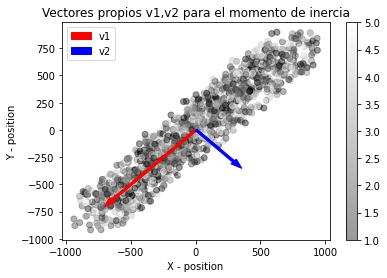

In [71]:
sc = plt.scatter(x_center, y_center, c=masas, cmap='gray', alpha=0.4)
plt.xlabel("X - position")
plt.ylabel("Y - position")
# plt.scatter(cmasa_x, cmasa_y, s=10, c='red', label='centro de masa')

plt.title("Vectores propios v1,v2 para el momento de inercia")

plt.arrow( cmasa_x[0], cmasa_y[0], v1[0]*1000, v1[1]*1000, length_includes_head=True, width=20, edgecolor="r", facecolor='r', label='v1')
plt.arrow( cmasa_x[0], cmasa_y[0], v2[0]*500, v2[1]*500, length_includes_head=True, width=20, edgecolor="b", facecolor='b', label='v2')
plt.legend()
plt.colorbar(sc)

* Encuentre la matriz de transformación de la base cartesiana a la base de autovectores conformada por los ejes principales.

In [87]:
tranform_matrix = v.T
new_basis = tranform_matrix @ _input.T
_input.shape

(1533, 2)

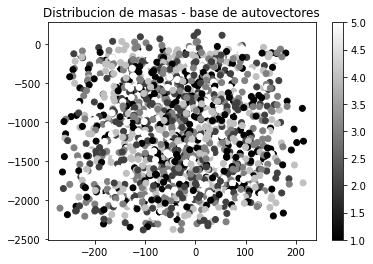

In [90]:
sc = plt.scatter(new_basis[0], new_basis[1], c=masas, cmap='gray')
plt.title("Distribucion de masas - base de autovectores")
plt.colorbar(sc)